In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
DATA_DIR = 'data/'
DATA_FILENAME = 'data_ldist_subset20k'

In [3]:
data_train = np.load(DATA_DIR + DATA_FILENAME + '_train' + '.npz')
X_train = data_train['X']
y_train = data_train['y']
data_train.close()
X_train.shape, y_train.shape

((20000, 2304), (20000,))

In [4]:
data_test = np.load(DATA_DIR + DATA_FILENAME + '_test' + '.npz')
X_test = data_test['X']
y_test = data_test['y']
data_test.close()
X_test.shape, y_test.shape

((10000, 2304), (10000,))

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
for variance in [0.90, 0.95, 0.97, 0.99]:
    pca = PCA(variance)
    pca.fit(X_train)
    print(f'{variance}: {pca.n_components_}', end=' ')

0.9: 15 0.95: 19 0.97: 21 0.99: 28 

In [6]:
pca = PCA(0.99)
pca.fit(X_train)
PCA_train = pca.transform(X_train)
PCA_test = pca.transform(X_test)
pca.n_components_

28

In [7]:
clf = LogisticRegression(class_weight='balanced', max_iter=3000)
clf.fit(PCA_train, y_train)
clf.n_iter_

array([39], dtype=int32)

In [8]:
clf.score(PCA_train, y_train)

0.7211

In [9]:
y_hat = clf.predict(PCA_test)
accuracy = metrics.accuracy_score(y_test, y_hat)
print(accuracy)

0.7217


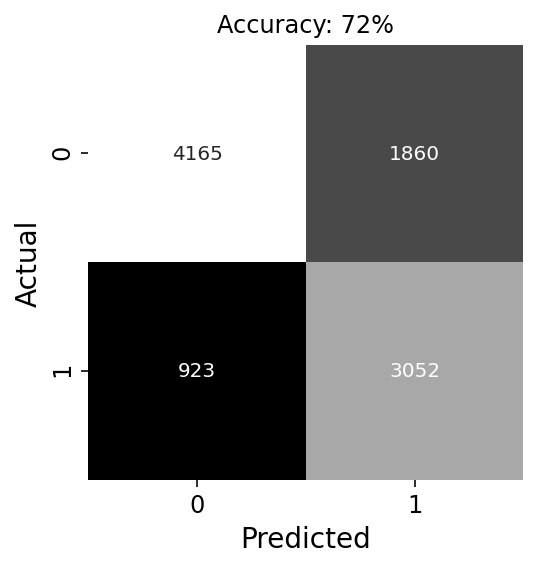

In [10]:
cm = metrics.confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, fmt=".0f", cmap='gray', cbar=False, square = True);
plt.ylabel('Actual', fontsize=14);
plt.xlabel('Predicted', fontsize=14);
plt.title(f'Accuracy: {accuracy*100:.0f}%');
plt.tick_params(labelsize= 12)